Training Q-Learning agent against random opponent...
Episode 5000/50000 | Win rate: 0.51 | Draw rate: 0.00 | Loss rate: 0.49 | Avg steps: 8.67 | Epsilon: 0.100 | Time: 5.4s
Episode 10000/50000 | Win rate: 0.55 | Draw rate: 0.00 | Loss rate: 0.45 | Avg steps: 9.11 | Epsilon: 0.100 | Time: 10.6s
Episode 15000/50000 | Win rate: 0.60 | Draw rate: 0.00 | Loss rate: 0.40 | Avg steps: 8.98 | Epsilon: 0.100 | Time: 15.9s
Episode 20000/50000 | Win rate: 0.54 | Draw rate: 0.00 | Loss rate: 0.46 | Avg steps: 9.26 | Epsilon: 0.100 | Time: 21.2s
Episode 25000/50000 | Win rate: 0.59 | Draw rate: 0.00 | Loss rate: 0.41 | Avg steps: 8.69 | Epsilon: 0.100 | Time: 26.5s
Episode 30000/50000 | Win rate: 0.60 | Draw rate: 0.00 | Loss rate: 0.40 | Avg steps: 8.98 | Epsilon: 0.100 | Time: 31.9s
Episode 35000/50000 | Win rate: 0.59 | Draw rate: 0.00 | Loss rate: 0.41 | Avg steps: 9.15 | Epsilon: 0.100 | Time: 37.2s
Episode 40000/50000 | Win rate: 0.53 | Draw rate: 0.00 | Loss rate: 0.47 | Avg steps: 9.01 | Ep

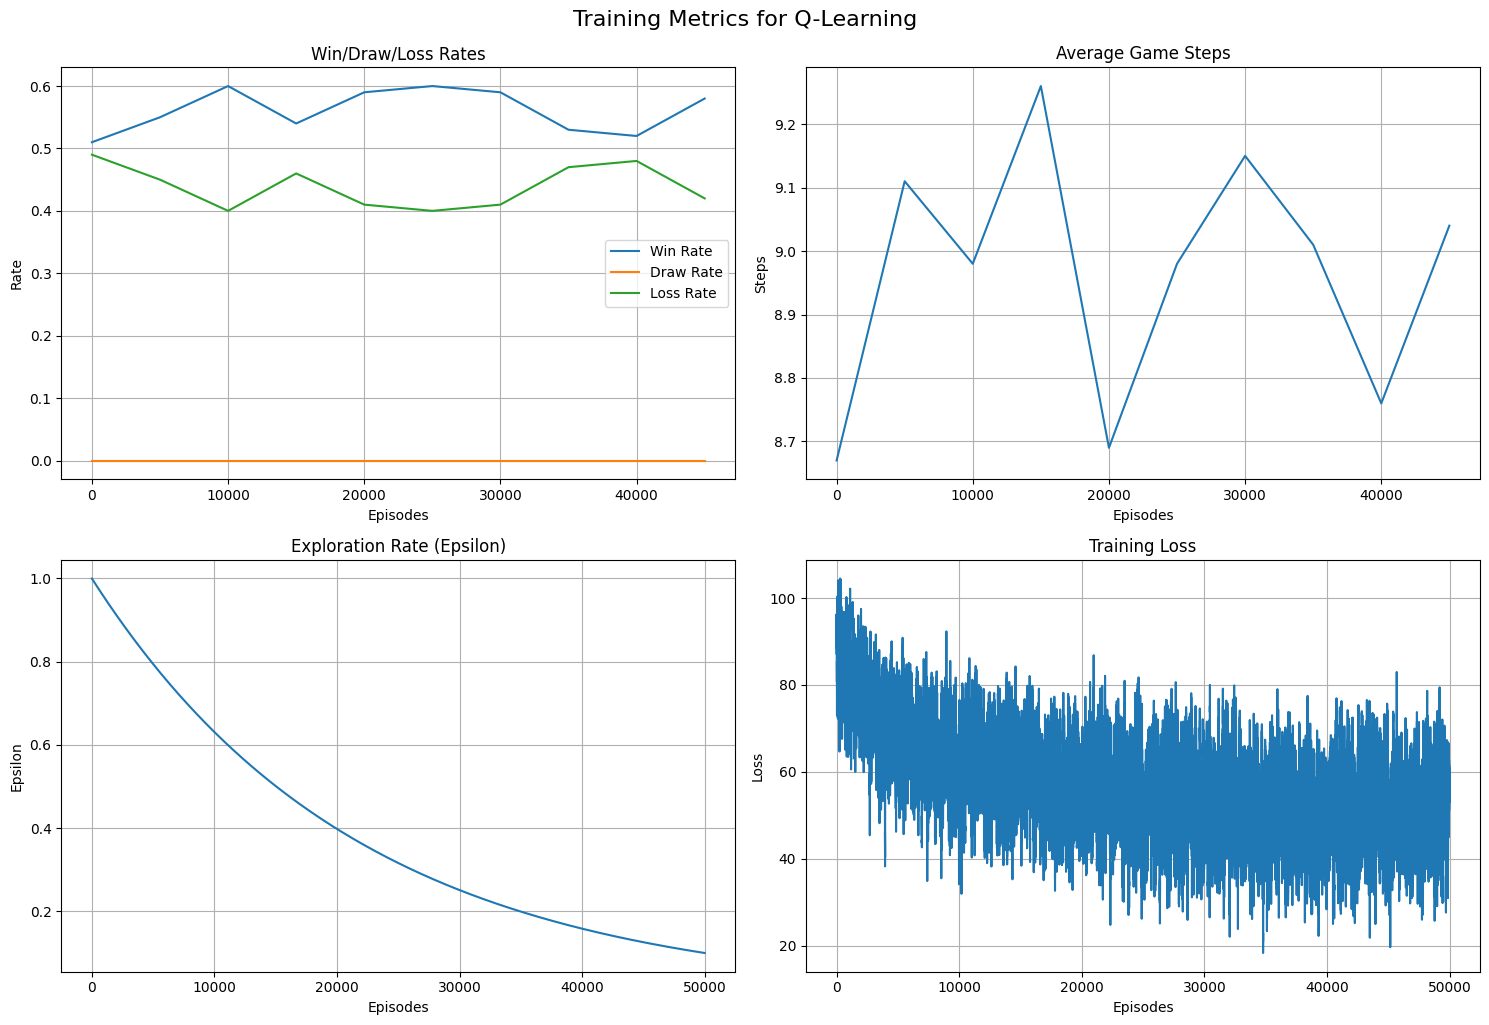

Model saved to q_agent.npy


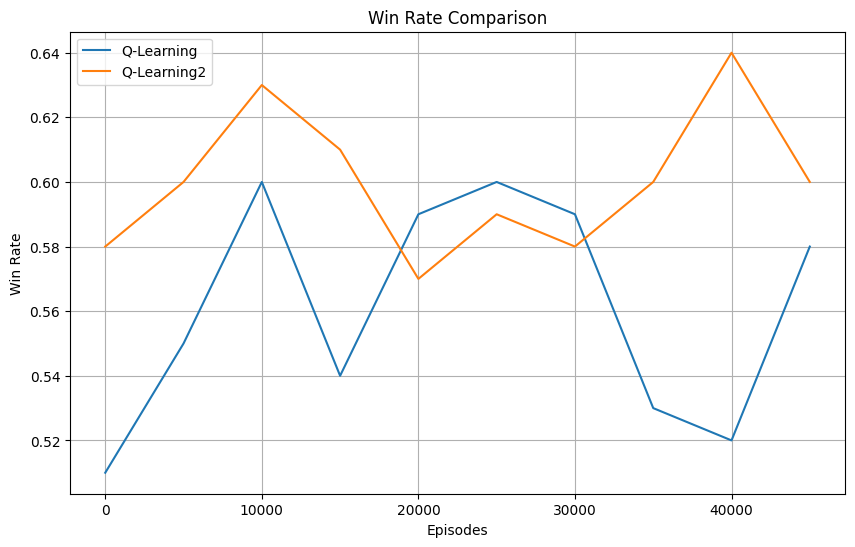


Game 1/100: Q-Learning vs Q-Learning2
Q-Learning (+1) plays: (0, 2)
Layer 0:
- - -
- - -
X - -

Layer 1:
- - -
- - -
- - -

Layer 2:
- - -
- - -
- - -

Q-Learning2 (-1) plays: (2, 1)
Layer 0:
- - -
- - O
X - -

Layer 1:
- - -
- - -
- - -

Layer 2:
- - -
- - -
- - -

Q-Learning (+1) plays: (2, 0)
Layer 0:
- - X
- - O
X - -

Layer 1:
- - -
- - -
- - -

Layer 2:
- - -
- - -
- - -

Q-Learning2 (-1) plays: (1, 1)
Layer 0:
- - X
- O O
X - -

Layer 1:
- - -
- - -
- - -

Layer 2:
- - -
- - -
- - -

Q-Learning (+1) plays: (0, 2)
Layer 0:
- - X
- O O
X - -

Layer 1:
- - -
- - -
X - -

Layer 2:
- - -
- - -
- - -

Q-Learning2 (-1) plays: (0, 1)
Layer 0:
- - X
O O O
X - -

Layer 1:
- - -
- - -
X - -

Layer 2:
- - -
- - -
- - -

Q-Learning2 wins!

Game 2/100: Q-Learning vs Q-Learning2
Q-Learning2 (+1) plays: (0, 1)
Layer 0:
- - -
X - -
- - -

Layer 1:
- - -
- - -
- - -

Layer 2:
- - -
- - -
- - -

Q-Learning (-1) plays: (1, 2)
Layer 0:
- - -
X - -
- O -

Layer 1:
- - -
- - -
- - -

Layer 2:
- - -
-

In [ ]:
import matplotlib.pyplot as plt
import torch

from game import TicTacToe3DEnv
from agents import QLearningAgent, DQNAgent
from framework import Trainer, Evaluator
from utils import plot_comparison

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ================= EXAMPLE USAGE =================

def example_usage():
    """Example usage of the framework."""
    # Create environment
    env = TicTacToe3DEnv(n=3)
    evaluator = Evaluator(env)
    # Create agents
    q_agent = QLearningAgent(env, name="Q-Learning", alpha=0.1, gamma=0.99, epsilon=1.0)
    q_agent2 = QLearningAgent(env, name="Q-Learning2", alpha=0.1, gamma=0.99, epsilon=1.0)
    dqn_agent = DQNAgent(env, name="DQN", alpha=1e-3, gamma=0.99, epsilon=1.0)
    # Create trainer fro Q and for DQN
    trainer_q = Trainer(env, q_agent)
    trainer_q2 = Trainer(env, q_agent2)
    trainer_dqn = Trainer(env, dqn_agent)

    print("Training Q-Learning agent against random opponent...")
    q_results = trainer_q.train_vs_random(episodes=50000, eval_every=5000, verbose=True)
    print("Training Q-Learning agent with self-play...")
    q_results2 = trainer_q2.train_self_play(episodes=50000, eval_every=5000, verbose=True, random_proba=0.2)
    
    # Plot metrics
    trainer_q.plot_metrics()
    
    # Save model
    q_agent.save("q_agent.npy")
    
    # print("\nTraining DQN agent with self-play...")
    # dqn_results = trainer_dqn.train_self_play(episodes=10000, eval_every=1000, verbose=True)
    
    # Save model
    # dqn_agent.save("dqn_agent.pt")
    
    # Plot metrics
    # trainer_dqn.plot_metrics()
    
    # Compare agents
    plot_comparison([q_results, q_results2], metric="win_rate", title="Win Rate Comparison")
    
    # Evaluate agents
    results = evaluator.agent_vs_agent(q_agent, q_agent2, episodes=100, render=True)
    print(results)
    # Play against human
    evaluator.human_vs_agent(q_agent, human_first=True)


if __name__ == "__main__":
    example_usage()

In [9]:
import numpy as np
from gym import spaces
spaces.Box(
            low=-1, high=1, shape=(2, 2, 2), dtype=np.int8
        ).sample()

array([[[-1,  0],
        [ 0, -1]],

       [[-1,  1],
        [ 0,  1]]], dtype=int8)